In [1]:
#ML code for Early detection of sepsis

#importing libraries

from os import listdir
import pandas as pd
import csv
import glob

In [2]:
#opening datasets
training_a = sorted(listdir(r'C:\Users\abinsh\Desktop\Data Sets\training_setA\training'))
training_b = sorted(listdir(r'C:\Users\abinsh\Desktop\Data Sets\training_setB\training_setB'))

In [3]:
#combining all datasets

#training dataset
with open("sepsis_train.psv", "wb") as fout:
    for i, csv in enumerate(training_a):
        if i == 0:
            with open(r'C:\Users\abinsh\Desktop\Data Sets\training_setA\training/' + csv, "rb") as f:
                fout.write(f.read())
                
# now the rest:
        with open(r'C:\Users\abinsh\Desktop\Data Sets\training_setA\training/' + csv, "rb") as f:
            next(f)
            fout.write(f.read())
    for i,csv in enumerate(training_b):
        if i <15000:
            with open(r'C:\Users\abinsh\Desktop\Data Sets\training_setB\training_setB/' + csv, "rb") as f:
                next(f)
                fout.write(f.read())
train_data = pd.read_csv('sepsis_train.psv', sep ='|')


#test dataset
with open("sepsis_test.psv", "wb") as fout:
    for i, csv in enumerate(training_b):
        if i >= 15000:
            if i == 15000:
                with open(r'C:\Users\abinsh\Desktop\Data Sets\training_setB\training_setB/' + csv, "rb") as f:
                    fout.write(f.read())
            with open(r'C:\Users\abinsh\Desktop\Data Sets\training_setB\training_setB/' + csv, "rb") as f:
                next(f)
                fout.write(f.read())
test_data = pd.read_csv('sepsis_test.psv', sep='|')

In [4]:
#Data Visualization & Analysis


#import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print(train_data)
print('_'*35)
print(test_data)

            HR  O2Sat  Temp    SBP    MAP   DBP  Resp  EtCO2  BaseExcess  \
0          NaN    NaN   NaN    NaN    NaN   NaN   NaN    NaN         NaN   
1         97.0   95.0   NaN   98.0  75.33   NaN  19.0    NaN         NaN   
2         89.0   99.0   NaN  122.0  86.00   NaN  22.0    NaN         NaN   
3         90.0   95.0   NaN    NaN    NaN   NaN  30.0    NaN        24.0   
4        103.0   88.5   NaN  122.0  91.33   NaN  24.5    NaN         NaN   
...        ...    ...   ...    ...    ...   ...   ...    ...         ...   
1361667   68.0  100.0   NaN  130.0  77.00  65.0  17.0    NaN         NaN   
1361668   72.0  100.0  37.0  100.0  63.00  49.0  18.5    NaN         NaN   
1361669   65.0   97.0   NaN  109.0  69.00  54.0  16.0    NaN         NaN   
1361670   60.0   98.0   NaN   92.0  55.00  41.0  18.0    NaN         NaN   
1361671   67.0   98.0   NaN  119.0  82.00  68.0  20.0    NaN         NaN   

         HCO3  ...  WBC  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  \
0       

0    1336657
1      25015
Name: SepsisLabel, dtype: int64


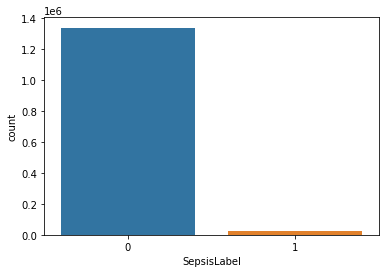

In [6]:
#sepsis count of train_dataset

print(train_data['SepsisLabel'].value_counts())

#visualise the count
sns.countplot(train_data['SepsisLabel'],label='count')

In [8]:
#look at datatypes to see which column need to be encoded
print(train_data.dtypes)
print("_"*35)
print(test_data.dtypes)

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender              

In [9]:
#Data Cleaning
#missing values
miss_train=train_data.isna().sum()
print(miss_train)

print('_'*35)

miss_test=test_data.isna().sum()
print(miss_test)

HR                   130133
O2Sat                175676
Temp                 902590
SBP                  199680
MAP                  165134
DBP                  459960
Resp                 198043
EtCO2               1319201
BaseExcess          1277998
HCO3                1297001
FiO2                1236770
pH                  1258514
PaCO2               1279813
SaO2                1311871
AST                 1339842
BUN                 1265550
Alkalinephos        1340093
Calcium             1283397
Chloride            1292412
Creatinine          1277512
Bilirubin_direct    1359132
Glucose             1138773
Lactate             1323998
Magnesium           1272850
Phosphate           1304990
Potassium           1231945
Bilirubin_total     1341905
TroponinI           1350388
Hct                 1235350
Hgb                 1258251
PTT                 1317887
WBC                 1272210
Fibrinogen          1352505
Platelets           1279609
Age                       0
Gender              

In [10]:
#missing percentage

missing_percent_train=(miss_train/train_data.shape[0])*100
print(missing_percent_train)

print("_"*35)

missing_percent_test=(miss_test/test_data.shape[0])*100
print(missing_percent_test)

HR                   9.556854
O2Sat               12.901492
Temp                66.285420
SBP                 14.664324
MAP                 12.127296
DBP                 33.779060
Resp                14.544105
EtCO2               96.880967
BaseExcess          93.855055
HCO3                95.250618
FiO2                90.827306
pH                  92.424167
PaCO2               93.988347
SaO2                96.342658
AST                 98.396824
BUN                 92.940884
Alkalinephos        98.415257
Calcium             94.251553
Chloride            94.913606
Creatinine          93.819363
Bilirubin_direct    99.813465
Glucose             83.630493
Lactate             97.233254
Magnesium           93.476990
Phosphate           95.837324
Potassium           90.472963
Bilirubin_total     98.548329
TroponinI           99.171313
Hct                 90.723023
Hgb                 92.404852
PTT                 96.784468
WBC                 93.429989
Fibrinogen          99.326784
Platelets 

In [11]:
#selecting features with more info

new_cols=list(missing_percent_train[missing_percent_train < 92].index)
print(new_cols)

['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Glucose', 'Potassium', 'Hct', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel']


In [12]:
#eliminating missing features
train=train_data[new_cols]
print(train)

print("_"*100)

test=test_data[new_cols]
print(test)

            HR  O2Sat  Temp    SBP    MAP   DBP  Resp  FiO2  Glucose  \
0          NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN      NaN   
1         97.0   95.0   NaN   98.0  75.33   NaN  19.0   NaN      NaN   
2         89.0   99.0   NaN  122.0  86.00   NaN  22.0   NaN      NaN   
3         90.0   95.0   NaN    NaN    NaN   NaN  30.0   NaN      NaN   
4        103.0   88.5   NaN  122.0  91.33   NaN  24.5  0.28      NaN   
...        ...    ...   ...    ...    ...   ...   ...   ...      ...   
1361667   68.0  100.0   NaN  130.0  77.00  65.0  17.0   NaN      NaN   
1361668   72.0  100.0  37.0  100.0  63.00  49.0  18.5   NaN      NaN   
1361669   65.0   97.0   NaN  109.0  69.00  54.0  16.0   NaN      NaN   
1361670   60.0   98.0   NaN   92.0  55.00  41.0  18.0   NaN    113.0   
1361671   67.0   98.0   NaN  119.0  82.00  68.0  20.0   NaN      NaN   

         Potassium  Hct    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0              NaN  NaN  83.14       0    NaN    NaN      

In [13]:
#Feature Engineering

#new_age
def fe_new_age(data):
    data.loc[data['Age']>=60,'new_age']='old'
    data.loc[data['Age']<10,'new_age']='infant'
    data.loc[(data['Age']<=60) & (data['Age']>10),'new_age']='adult'
    
    return data

In [14]:
#new_heart_rate
def fe_new_hr(data):
    data.loc[(data['HR']>=70) & (data['HR']<110) & (data['Age']<10),'new_hr']='normal'
    data.loc[(data['HR']>60) & (data['HR']<100) & (data['Age']>=10),'new_hr']='normal'
    data.loc[((data['HR']<70) | (data['HR']>=110)) & (data['Age']<10),'new_hr']='abnormal'
    data.loc[(data['HR']>=100)  & (data['Age']>=10),'new_hr']='abnormal'
    
    data['new_hr'].fillna('Missing',inplace=True)
    
    return data

In [15]:
#new_o2_sat
def fe_new_o2sat(data):
    data.loc[(data['O2Sat'] >= 95) & (data['O2Sat'] < 100), 'new_o2sat'] = 'normal'
    data.loc[(data['O2Sat'] < 95) & (data['O2Sat'] >= 0), 'new_o2sat'] = 'abnormal'
    data['new_o2sat'].fillna('missing', inplace=True)
    return data

#new_temp
def fe_new_temp(data):
    data.loc[(data['Temp'] >= 36) & (data['Temp'] < 38),'new_temp'] = 'normal'
    data.loc[(data['Temp'] < 36) | (data['Temp'] >= 38),'new_temp'] = 'abnormal'
    data['new_temp'].fillna('Missing', inplace=True)
    return data

In [16]:
#new BP

def fe_new_bp(data):
    data.loc[(data['SBP'] < 90) & (data['DBP'] < 60), 'new_bp'] = 'low'
    data.loc[(data['SBP'].between(90,120, inclusive=True)) & (data['DBP'].between(60,80, inclusive=True)), 'new_bp'] = 'normal'
    data.loc[(data['SBP'].between(120,140, inclusive=True)) & (data['DBP'].between(80,90, inclusive=True)),'new_bp'] = 'elevated'
    data.loc[(data['SBP'] > 140 ) & (data['DBP'] > 90 ), 'new_bp'] = 'high'
    data['new_bp'].fillna('Missing', inplace=True)
    return data

In [17]:
#new_respiratory_rate

def fe_new_resp(data):
    data.loc[(data['Resp'].between(30, 60)) & (data['Age'] < 1), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(24, 40)) & (data['Age'].between(1, 3)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(22, 34)) & (data['Age'].between(3, 6)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(18, 30)) & (data['Age'].between(6, 12)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(12, 16)) & (data['Age'].between(12, 18)), 'new_resp'] = 'normal'  
    data.loc[(data['Resp'].between(12, 20)) & (data['Age'] > 18), 'new_resp'] = 'normal'  
    
    data.loc[((data['Resp'] < 30) | (data['Resp'] > 60)) & (data['Age'] <1) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 24) | (data['Resp'] > 40)) & (data['Age'].between(1, 3)) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 22) | (data['Resp'] > 34)) & (data['Age'].between(3, 6)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 18) | (data['Resp'] > 30)) & (data['Age'].between(6, 12)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 16)) & (data['Age'].between(12, 18)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 20)) & (data['Age'] > 18) ,'new_resp'] = 'abnormal'
    
    
    data['new_resp'].fillna('missing', inplace = True)
                                                            
    return data

In [18]:
#new_mean_arterial_pressure
def fe_new_map(data):
    data.loc[(data['MAP'] >= 70) & (data['MAP'] < 100),'new_map'] = 'normal'
    data.loc[(data['MAP'] < 70) | (data['MAP'] >= 100),'new_map'] = 'abnormal'
    data['new_map'].fillna('Missing', inplace=True)
    return data

#new_fraction_of_inspi_o2
def fe_new_fio2(data):
    data.loc[(data['FiO2'] < 0.8 ) ,'new_fio2'] = 'normal'
    data.loc[(data['FiO2'] >= 0.8 ),'new_fio2'] = 'abnormal'
    data['new_fio2'].fillna('Missing', inplace=True)
    return data

In [19]:
#new train_data
train=fe_new_age(train)
train=fe_new_hr(train)
train=fe_new_fio2(train)
train=fe_new_map(train)
train=fe_new_resp(train)
train=fe_new_bp(train)
train=fe_new_temp(train)
train=fe_new_o2sat(train)

print(train)

C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

            HR  O2Sat  Temp    SBP    MAP   DBP  Resp  FiO2  Glucose  \
0          NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN      NaN   
1         97.0   95.0   NaN   98.0  75.33   NaN  19.0   NaN      NaN   
2         89.0   99.0   NaN  122.0  86.00   NaN  22.0   NaN      NaN   
3         90.0   95.0   NaN    NaN    NaN   NaN  30.0   NaN      NaN   
4        103.0   88.5   NaN  122.0  91.33   NaN  24.5  0.28      NaN   
...        ...    ...   ...    ...    ...   ...   ...   ...      ...   
1361667   68.0  100.0   NaN  130.0  77.00  65.0  17.0   NaN      NaN   
1361668   72.0  100.0  37.0  100.0  63.00  49.0  18.5   NaN      NaN   
1361669   65.0   97.0   NaN  109.0  69.00  54.0  16.0   NaN      NaN   
1361670   60.0   98.0   NaN   92.0  55.00  41.0  18.0   NaN    113.0   
1361671   67.0   98.0   NaN  119.0  82.00  68.0  20.0   NaN      NaN   

         Potassium  ...  ICULOS  SepsisLabel  new_age    new_hr  new_fio2  \
0              NaN  ...       1            0      old   Mi

In [20]:
#new test_data
test=fe_new_age(test)
test=fe_new_hr(test)
test=fe_new_fio2(test)
test=fe_new_map(test)
test=fe_new_resp(test)
test=fe_new_bp(test)
test=fe_new_temp(test)
test=fe_new_o2sat(test)

print(test)

C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

          HR  O2Sat  Temp    SBP    MAP   DBP  Resp  FiO2  Glucose  Potassium  \
0        NaN    NaN   NaN    NaN    NaN   NaN   NaN   NaN      NaN        NaN   
1       67.0   95.0   NaN  165.5  106.0  76.0   NaN   NaN      NaN        NaN   
2       62.0   95.0  36.0  161.0  104.0  75.0   NaN   NaN      NaN        NaN   
3       68.0   96.0   NaN  155.5  101.5  73.5   NaN   NaN    110.0        NaN   
4       65.0   95.0  36.1  142.0   87.0  61.0   NaN   NaN      NaN        NaN   
...      ...    ...   ...    ...    ...   ...   ...   ...      ...        ...   
190610  80.0   96.0   NaN  115.0   87.0  65.0  15.0   NaN      NaN        NaN   
190611  74.0   97.0   NaN  114.0   83.0  67.0  15.0   NaN      NaN        NaN   
190612  78.0   98.0   NaN  110.0   83.0  69.0  15.0   NaN      NaN        NaN   
190613  82.0   99.0  36.6  124.0   91.0  71.0  16.0   NaN    242.0        NaN   
190614  80.0   97.0   NaN  121.0   97.0  73.0  15.0   NaN      NaN        NaN   

        ...  ICULOS  Sepsis

In [24]:
#feature selected
columns_new = ['Gender', 'new_age', 'new_o2sat', 'new_temp', 'new_bp', 'new_resp', 'new_map', 'new_fio2', 'new_hr', 'HospAdmTime', 'ICULOS']

target_col = ['SepsisLabel']

selected_cols = columns_new + target_col

In [25]:
#new dataset
_train = train[selected_cols]
print(_train)

print("_"*100)
_test = test[selected_cols]
print(_test)

         Gender new_age new_o2sat new_temp   new_bp  new_resp   new_map  \
0             0     old   missing  Missing  Missing   missing   Missing   
1             0     old    normal  Missing  Missing    normal    normal   
2             0     old    normal  Missing  Missing  abnormal    normal   
3             0     old    normal  Missing  Missing  abnormal   Missing   
4             0     old  abnormal  Missing  Missing  abnormal    normal   
...         ...     ...       ...      ...      ...       ...       ...   
1361667       0     old   missing  Missing  Missing    normal    normal   
1361668       0     old   missing   normal  Missing    normal  abnormal   
1361669       0     old    normal  Missing  Missing    normal  abnormal   
1361670       0     old    normal  Missing  Missing    normal  abnormal   
1361671       0     old    normal  Missing   normal    normal    normal   

        new_fio2    new_hr  HospAdmTime  ICULOS  SepsisLabel  
0        Missing   Missing        -0

In [26]:
#splitting x & y

#train
X_train=_train[columns_new]
Y_train=_train[target_col]

#test
X_test=_test[columns_new]
Y_test=_test[target_col]

In [27]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
for col in X_train.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

<ipython-input-28-9827f4737f32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=le.transform(X_train[col])
<ipython-input-28-9827f4737f32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col]=le.transform(X_test[col])


In [29]:
#visualizing encoded data
print(X_train)

print("_"*100)

print(X_test)

         Gender  new_age  new_o2sat  new_temp  new_bp  new_resp  new_map  \
0             0        1          1         0       0         1        0   
1             0        1          2         0       0         2        2   
2             0        1          2         0       0         0        2   
3             0        1          2         0       0         0        0   
4             0        1          0         0       0         0        2   
...         ...      ...        ...       ...     ...       ...      ...   
1361667       0        1          1         0       0         2        2   
1361668       0        1          1         2       0         2        1   
1361669       0        1          2         0       0         2        1   
1361670       0        1          2         0       0         2        1   
1361671       0        1          2         0       4         2        2   

         new_fio2  new_hr  HospAdmTime  ICULOS  
0               0       0        -0.03

In [30]:
#null values
print(X_train.isnull().sum())
print("_"*40)
print(X_test.isnull().sum())

Gender         0
new_age        0
new_o2sat      0
new_temp       0
new_bp         0
new_resp       0
new_map        0
new_fio2       0
new_hr         0
HospAdmTime    8
ICULOS         0
dtype: int64
________________________________________
Gender         0
new_age        0
new_o2sat      0
new_temp       0
new_bp         0
new_resp       0
new_map        0
new_fio2       0
new_hr         0
HospAdmTime    0
ICULOS         0
dtype: int64


In [41]:
X_train=X_train.dropna(subset=['HospAdmTime'])

In [60]:
#Training & Testing

#logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train[1:10000],Y_train[1:10000])

C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\abinsh\anaconda3\anaconda feb 6\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,log.predict(X_test))

0.9828292631744616

In [62]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train[1:10000],Y_train[1:10000])

<ipython-input-62-581e5cfb4966>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train[1:10000],Y_train[1:10000])


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [63]:
accuracy_score(Y_test,forest.predict(X_test))

0.9762453112294416

[[185933   1781]
 [  2747    154]]

testing accuracy: 0.9762453112294416

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    187714
           1       0.08      0.05      0.06      2901

    accuracy                           0.98    190615
   macro avg       0.53      0.52      0.53    190615
weighted avg       0.97      0.98      0.97    190615




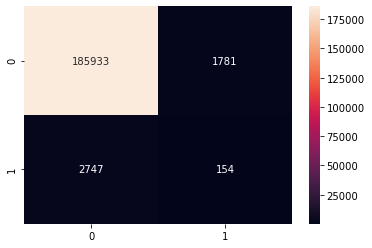

In [81]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#random forest
cmr=confusion_matrix(Y_test,forest.predict(X_test))
TP=cmr[0][0]
TN=cmr[1][1]
FN=cmr[1][0]
FP=cmr[0][1]
print(cmr)
print()
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))
print()
print(classification_report(Y_test,forest.predict(X_test)))
print()
sns.heatmap(cmr,annot=True,fmt="d")

[[187295    419]
 [  2854     47]]

testing accuracy: 0.9828292631744616

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    187714
           1       0.10      0.02      0.03      2901

    accuracy                           0.98    190615
   macro avg       0.54      0.51      0.51    190615
weighted avg       0.97      0.98      0.98    190615




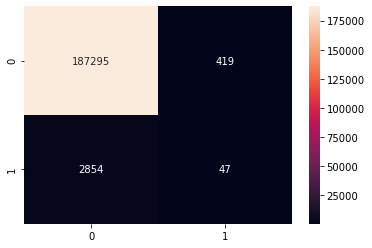

In [82]:
#logistic regression
cml=confusion_matrix(Y_test,log.predict(X_test))
TP=cml[0][0]
TN=cml[1][1]
FN=cml[1][0]
FP=cml[0][1]
print(cml)
print()
print('testing accuracy:',(TP+TN)/(TP+TN+FN+FP))
print()
print(classification_report(Y_test,log.predict(X_test)))
print()
sns.heatmap(cml,annot=True,fmt="d")

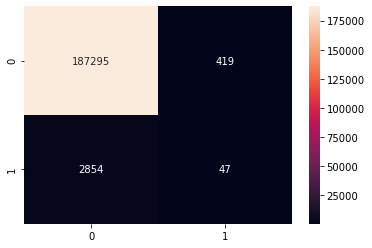